# Decision Tree Classifier

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> Math : Library for Mathematical functions in Python
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Use file animeTV_MachineLearning.csv which contains the sampled data to combat data imbalance

In [2]:
animedata = pd.read_csv('animeTV_MachineLearning.csv')
animedata.head()

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,4004,5184,Negibouzu no Asatarou,0,"Adventure, Comedy, Historical",Unknown,ねぎぼうずのあさたろう,TV,48,"Oct 12, 2008 to Sep 27, 2009",...,0,0,0,0,0,1,0,0,0,0
1,3033,3436,Meme Iroiro Yume no Tabi,700,"Adventure, Kids, Sci-Fi",The Many Dream Journeys of Meme,ミームいろいろ夢の旅,TV,127,"Apr 3, 1983 to Sep 29, 1985",...,0,0,0,0,0,0,0,1,0,0
2,148,170,Slam Dunk,900,"Comedy, Drama, School, Shounen, Sports",Slam Dunk,スラムダンク,TV,101,"Oct 16, 1993 to Mar 23, 1996",...,1,0,0,0,0,0,0,0,0,0
3,8395,21085,Witch Craft Works,800,"Action, Fantasy, Magic, Seinen, Supernatural",Unknown,ウィッチクラフトワークス,TV,12,"Jan 5, 2014 to Mar 23, 2014",...,1,0,0,0,0,0,0,0,0,0
4,6269,10554,Yakyuukyou no Uta,700,"Action, Drama, Sports",Unknown,野球狂の詩,TV,25,"Dec 23, 1977 to Mar 26, 1979",...,1,0,0,0,0,0,0,0,0,0


# Machine Learning



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6164383561643836

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5683060109289617



Accuracy 	Train Dataset
True Positive Rate 	: 32.080924855491325
False Positive Rate 	: 11.71875
Accuracy 	Test Dataset
True Positive Rate 	: 27.956989247311824
False Positive Rate 	: 13.333333333333334
ACCURACY OF THE MODEL:  0.5683060109289617


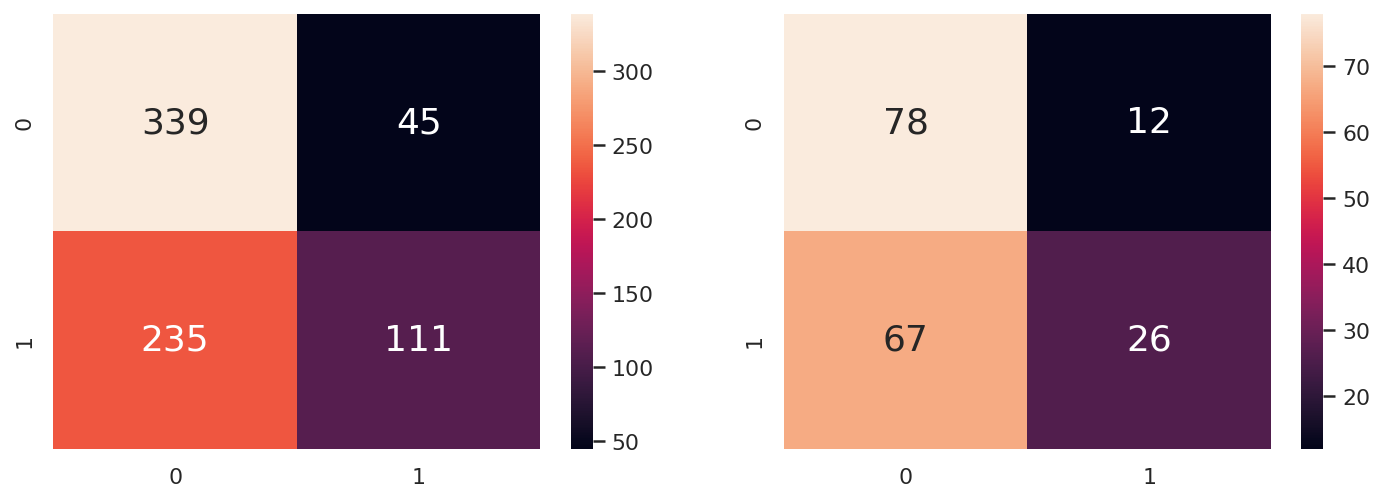

In [3]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Extract Response and Predictors
SP = pd.DataFrame(animedata[["Score", "Ranked", "isManga"]])   # Predictors
HS = pd.DataFrame(animedata['HasSequel'])    # Response

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, HS, test_size = 0.20, train_size = 0.80)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train.values, y_train.values)                    # train the decision tree model

# performing predictions on the test dataset
y_pred = dectree.predict(X_test.values)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train.values)
y_test_pred = dectree.predict(X_test.values)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train.values, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test.values, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#Print the True & False Positive Rates & Classification Accuracy for the train set
cm = metrics.confusion_matrix(y_train, y_train_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTrain Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

#Print the True & False Positive Rates & Classification Accuracy for the test set
cm = metrics.confusion_matrix(y_test, y_test_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTest Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

# using metrics module for accuracy calculation
x = metrics.accuracy_score(y_test, y_pred)

print("ACCURACY OF THE MODEL: ", x)

[Text(0.5, 0.8333333333333334, 'Ranked <= 1839.0\ngini = 0.499\nsamples = 730\nvalue = [384, 346]\nclass = Sequel'),
 Text(0.25, 0.5, 'Ranked <= 3.0\ngini = 0.43\nsamples = 163\nvalue = [51, 112]\nclass = No Sequel'),
 Text(0.125, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = Sequel'),
 Text(0.375, 0.16666666666666666, 'gini = 0.411\nsamples = 156\nvalue = [45, 111]\nclass = No Sequel'),
 Text(0.75, 0.5, 'Ranked <= 8505.5\ngini = 0.485\nsamples = 567\nvalue = [333, 234]\nclass = Sequel'),
 Text(0.625, 0.16666666666666666, 'gini = 0.495\nsamples = 383\nvalue = [210, 173]\nclass = Sequel'),
 Text(0.875, 0.16666666666666666, 'gini = 0.443\nsamples = 184\nvalue = [123, 61]\nclass = Sequel')]

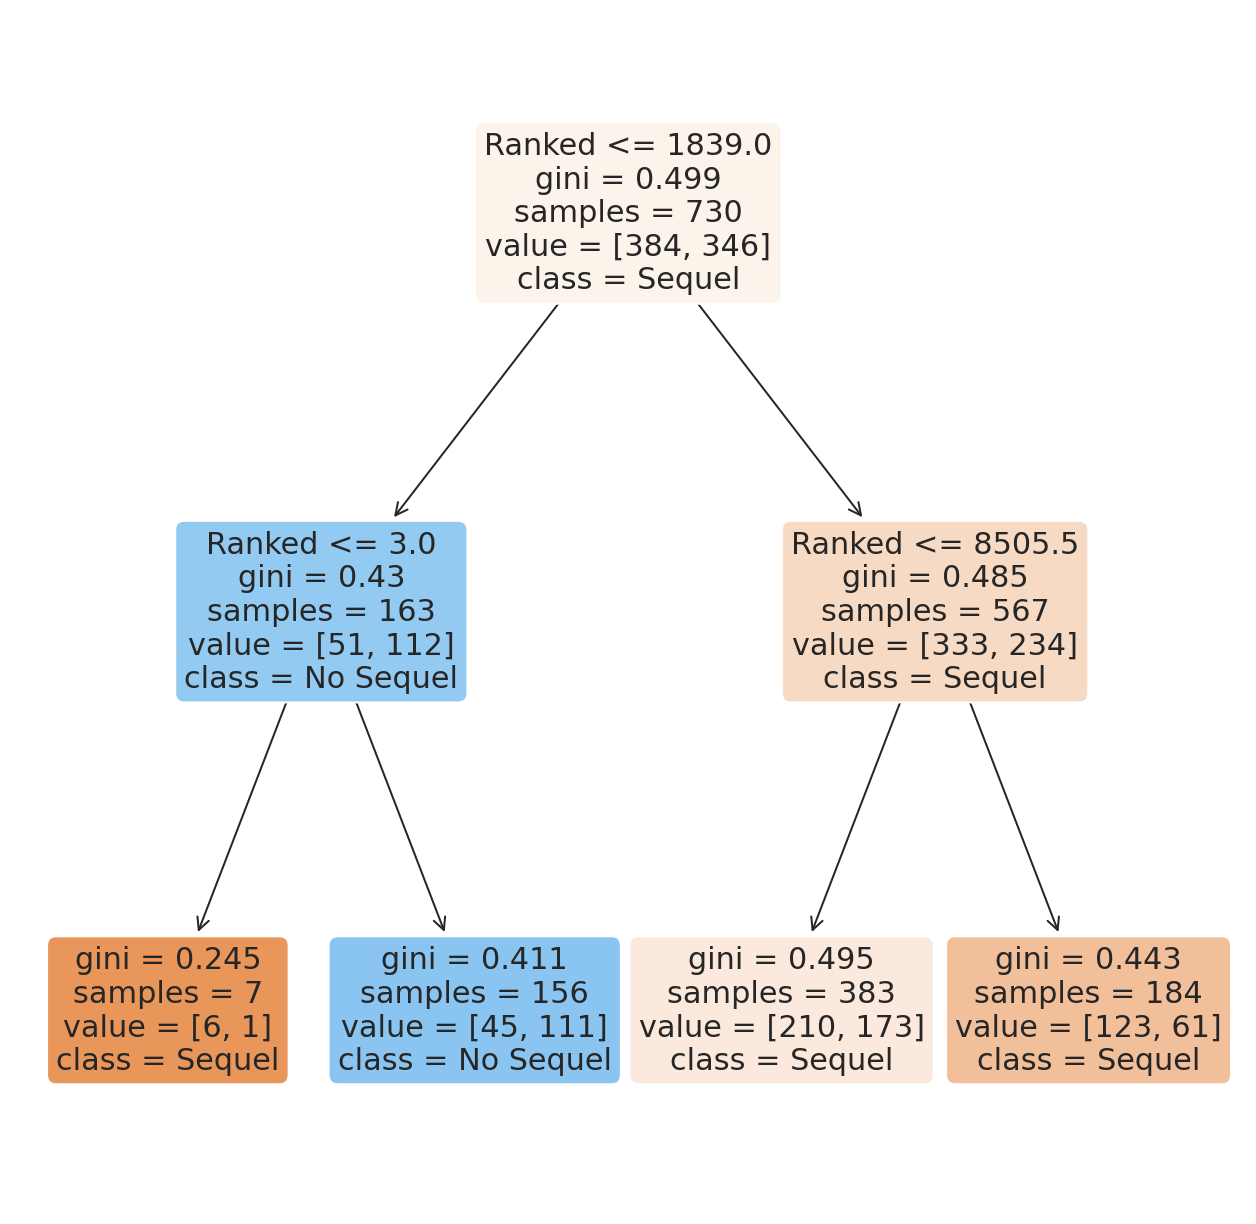

In [4]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(11,11))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Sequel","No Sequel"])